<div>
    <img src="images/emlyon.png" style="height:60px; float:left; padding-right:10px; margin-top:5px" />
    <span>
        <h1 style="padding-bottom:5px;"> Smart Supply Chain </h1>
        <a href="https://masters.em-lyon.com/fr/msc-in-data-science-artificial-intelligence-strategy">[Emlyon]</a> MSc in Data Science & Artificial Intelligence Strategy (DSAIS) <br/>
         February 2023, Paris | © Saeed VARASTEH
    </span>
</div>

### Part 05 - Exercises 02 : The Forecast Competition

---
<img src="images/competition.png" style="width:100px; position:absolute; top:-10px; right:0;"/>

__Objective__: Predict three months of item sales at different stores.

__Dataset description__

You are given a file named `store_sales.csv`:

    date - Date
    store - Store ID
    item - Item ID
    sales - Number of items sold at a particular store on a particular date.
    


### Import data and modules

#### Import modules

In [419]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

#### Import data

In [420]:
sales = pd.read_csv('./data/store/store_sales.csv')
print(sales.shape)
sales.head(5)

(913000, 4)


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [421]:
sales.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

## <span style="color:steelblue;">  Data Exploration  </span>


In [422]:
sales.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

#### The data in the sales dataset are from which period?

__Hint:__ find the minimum and the maximum of the date.<br/>
__Hint:__ do not forget to convert the `date` column into datetime.

In [423]:
sales['date'] = pd.to_datetime(sales['date'])

In [424]:
sales['date'].min(), sales['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

In [425]:
sales.sort_values(by=['date'], axis=0, inplace=True)

#### How many unique items and stores are in the dataset?

In [426]:
len(sales.item.unique()), len(sales.store.unique())

(50, 10)

#### Plot average monthly sales for the item_id == 10 at store_id == 1

In [427]:
sales = sales[sales.store == 1][sales.item == 10]

In [428]:
df_product_month_1 = pd.DataFrame(sales.groupby(pd.PeriodIndex(sales2.date, freq="M")).mean())

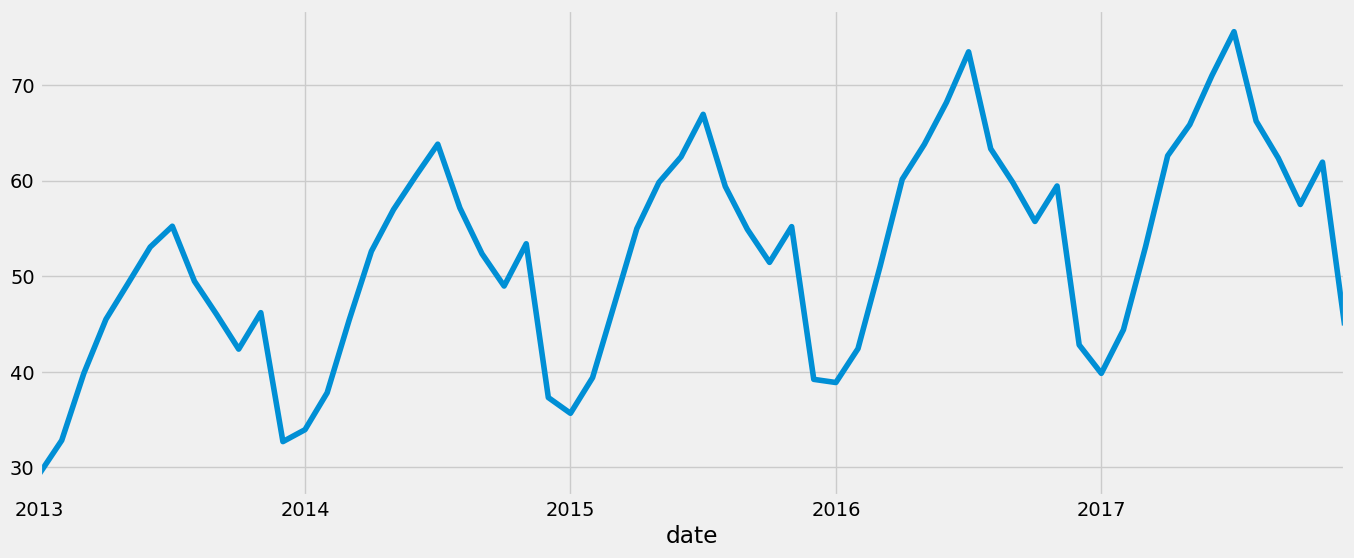

In [418]:
fig = plt.figure(figsize=(15, 6))
sales_month_1.plot(kind="line");

---

## <span style="color:steelblue;">  Machine Learning for Time Series Forecasting  </span>


### <span style="color:DarkGray;">  Data preprocessing and Feature engineering  </span>

#### Extract some useful features (e.g. lag, rolling mean, datetime) to use in a machine learning model and them to the `sales` DataFrame.

In [429]:
sales["lag_28"] = sales[["store","item","sales"]].groupby(["store", "item"])["sales"].shift(28)

In [430]:
sales["rmean_7"] = sales[["store","item","sales"]].groupby(["store", "item"])["sales"].transform(lambda x : x.rolling(7).mean())

In [431]:
sales["rmean_28_7"] = sales[["store","item", "lag_28"]].groupby(["store", "item"])["lag_28"].transform(lambda x : x.rolling(7).mean())

In [432]:
sales["rmax_7"] = sales[["store", "item", "sales"]].groupby(["store","item"])["sales"].transform(lambda x: x.rolling(window=7).max()).astype(np.float16)

In [433]:
sales['quarter'] = sales['date'].dt.quarter.astype("int16")
sales['month'] = sales['date'].dt.month.astype("int16")
sales['day'] = sales['date'].dt.day.astype("int16")

In [434]:
mean_sales = sales[["store", "item", "sales"]].groupby(["store", "item"])["sales"].transform(lambda x : x.rolling(7).mean())

In [435]:
sales["mad"] = (sales["sales"] - mean_sales) / mean_sales

In [436]:
sales

,date,store,item,sales,lag_28,rmean_7,rmean_28_7,rmax_7,quarter,month,day,mad
164340,2013-01-01,1,10,37,NaN,NaN,NaN,NaN,1,1,1,NaN
164341,2013-01-02,1,10,34,NaN,NaN,NaN,NaN,1,1,2,NaN
164342,2013-01-03,1,10,32,NaN,NaN,NaN,NaN,1,1,3,NaN
164343,2013-01-04,1,10,45,NaN,NaN,NaN,NaN,1,1,4,NaN
164344,2013-01-05,1,10,35,NaN,NaN,NaN,NaN,1,1,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
166161,2017-12-27,1,10,55,96.0,61.571429,84.428571,88.0,4,12,27,-0.106729
166162,2017-12-28,1,10,63,73.0,60.714286,83.714286,88.0,4,12,28,0.037647
166163,2017-12-29,1,10,56,71.0,60.142857,81.428571,88.0,4,12,29,-0.068884
166164,2017-12-30,1,10,78,60.0,61.714286,76.428571,88.0,4,12,30,0.263889


### <span style="color:DarkGray;">  Train and test split  </span>

#### Split sales data into the __train__ and __test__ datasets. 

In [437]:
sales.dropna(inplace=True)

In [438]:
split_date = "2017-10-01"

In [439]:
train = sales.loc[sales.date < split_date].copy()
test = sales.loc[sales.date >= split_date].copy()

In [440]:
print(train.shape)
print(test.shape)

(1700, 12)
(92, 12)


In [441]:
train

,date,store,item,sales,lag_28,rmean_7,rmean_28_7,rmax_7,quarter,month,day,mad
164374,2013-02-04,1,10,38,37.0,36.571429,39.142857,45.0,1,2,4,0.039063
164375,2013-02-05,1,10,42,37.0,37.857143,39.142857,45.0,1,2,5,0.109434
164376,2013-02-06,1,10,39,32.0,39.714286,38.857143,45.0,1,2,6,-0.017986
164377,2013-02-07,1,10,44,36.0,40.571429,39.428571,45.0,1,2,7,0.084507
164378,2013-02-08,1,10,47,33.0,40.857143,37.714286,47.0,1,2,8,0.150350
...,...,...,...,...,...,...,...,...,...,...,...,...
166069,2017-09-26,1,10,88,82.0,85.000000,85.285714,93.0,3,9,26,0.035294
166070,2017-09-27,1,10,76,79.0,83.142857,83.857143,93.0,3,9,27,-0.085911
166071,2017-09-28,1,10,74,85.0,81.571429,85.142857,93.0,3,9,28,-0.092820
166072,2017-09-29,1,10,85,64.0,80.571429,80.142857,93.0,3,9,29,0.054965


In [442]:
test

,date,store,item,sales,lag_28,rmean_7,rmean_28_7,rmax_7,quarter,month,day,mad
166074,2017-10-01,1,10,88,81.0,78.714286,76.857143,88.0,4,10,1,0.117967
166075,2017-10-02,1,10,73,54.0,79.714286,75.714286,88.0,4,10,2,-0.084229
166076,2017-10-03,1,10,84,73.0,79.142857,74.428571,88.0,4,10,3,0.061372
166077,2017-10-04,1,10,62,70.0,77.142857,73.142857,88.0,4,10,4,-0.196296
166078,2017-10-05,1,10,60,67.0,75.142857,70.571429,88.0,4,10,5,-0.201521
...,...,...,...,...,...,...,...,...,...,...,...,...
166161,2017-12-27,1,10,55,96.0,61.571429,84.428571,88.0,4,12,27,-0.106729
166162,2017-12-28,1,10,63,73.0,60.714286,83.714286,88.0,4,12,28,0.037647
166163,2017-12-29,1,10,56,71.0,60.142857,81.428571,88.0,4,12,29,-0.068884
166164,2017-12-30,1,10,78,60.0,61.714286,76.428571,88.0,4,12,30,0.263889


#### Create input (`x`) and output (`y`) variables
Note: use __sales__ as the output column.

In [443]:
x_train = train.drop(columns=["sales","date"])
y_train = train["sales"]
x_test = test.drop(columns=["sales","date"])
y_test = test["sales"]

In [444]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1700, 10) (1700,)
(92, 10) (92,)


In [445]:
x_train

,store,item,lag_28,rmean_7,rmean_28_7,rmax_7,quarter,month,day,mad
164374,1,10,37.0,36.571429,39.142857,45.0,1,2,4,0.039063
164375,1,10,37.0,37.857143,39.142857,45.0,1,2,5,0.109434
164376,1,10,32.0,39.714286,38.857143,45.0,1,2,6,-0.017986
164377,1,10,36.0,40.571429,39.428571,45.0,1,2,7,0.084507
164378,1,10,33.0,40.857143,37.714286,47.0,1,2,8,0.150350
...,...,...,...,...,...,...,...,...,...,...
166069,1,10,82.0,85.000000,85.285714,93.0,3,9,26,0.035294
166070,1,10,79.0,83.142857,83.857143,93.0,3,9,27,-0.085911
166071,1,10,85.0,81.571429,85.142857,93.0,3,9,28,-0.092820
166072,1,10,64.0,80.571429,80.142857,93.0,3,9,29,0.054965


In [446]:
x_test

,store,item,lag_28,rmean_7,rmean_28_7,rmax_7,quarter,month,day,mad
166074,1,10,81.0,78.714286,76.857143,88.0,4,10,1,0.117967
166075,1,10,54.0,79.714286,75.714286,88.0,4,10,2,-0.084229
166076,1,10,73.0,79.142857,74.428571,88.0,4,10,3,0.061372
166077,1,10,70.0,77.142857,73.142857,88.0,4,10,4,-0.196296
166078,1,10,67.0,75.142857,70.571429,88.0,4,10,5,-0.201521
...,...,...,...,...,...,...,...,...,...,...
166161,1,10,96.0,61.571429,84.428571,88.0,4,12,27,-0.106729
166162,1,10,73.0,60.714286,83.714286,88.0,4,12,28,0.037647
166163,1,10,71.0,60.142857,81.428571,88.0,4,12,29,-0.068884
166164,1,10,60.0,61.714286,76.428571,88.0,4,12,30,0.263889


### <span style="color:DarkGray;"> Model training and validation </span>

#### Train a  model on the train and validate your model on the test dataset (report your SMAPE score)

In [447]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

#### Linear Regression model

In [448]:
%%time
from sklearn.linear_model import LinearRegression

# Fitting the model on train
model = LinearRegression()
model.fit(x_train, y_train)

# Predicting the outputs for test
y_pred = model.predict(x_test)

# Evaluating with SMAPE
print(f"LR SMAPE: {smape(np.c_[y_test],np.c_[y_pred])}")

LR SMAPE: 2.303611947321099
Wall time: 30.7 ms


#### Your model

In [449]:
%%time
import lightgbm as lgb

# Fitting the model on train
model = lgb.LGBMRegressor(
        n_estimators=1000,
        learning_rate=0.3,
        subsample=0.8,
        colsample_bytree=0.8,
        max_depth=8,
        num_leaves=50,
        min_child_weight=300)
model.fit(x_train, y_train)

# Predicting the outputs for test
y_pred = model.predict(x_test)

# Evaluating with SMAPE
print(f"LR SMAPE: {smape(np.c_[y_test],np.c_[y_pred])}")

LR SMAPE: 4.155928684041324
Wall time: 151 ms


In [450]:
%%time
import xgboost as xgb

# Fitting the model on train
model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=300)
model.fit(x_train, y_train)

# Predicting the outputs for test
y_pred = model.predict(x_test)

# Evaluating with SMAPE
print(f"LR SMAPE: {smape(np.c_[y_test],np.c_[y_pred])}")

LR SMAPE: 1.678256937513764
Wall time: 314 ms


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

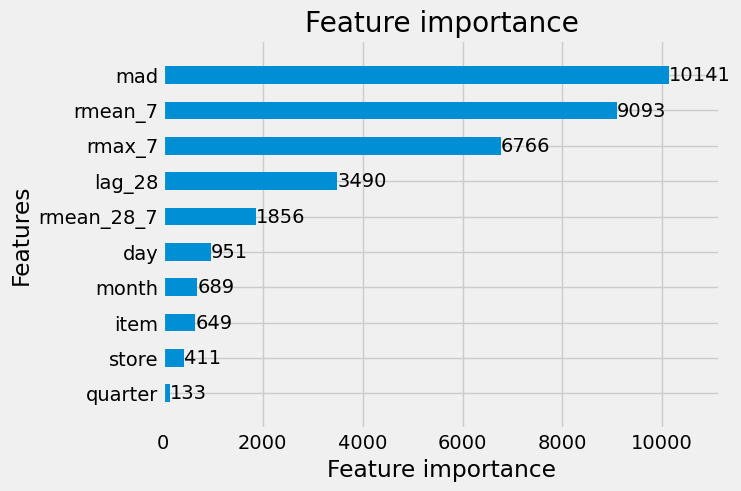

In [413]:
lgb.plot_importance(model,height = 0.5)

#### Plot store_id = 1, item_id == 10 actual sales data and their prediction from October 2017 to December 2017 (92 days).

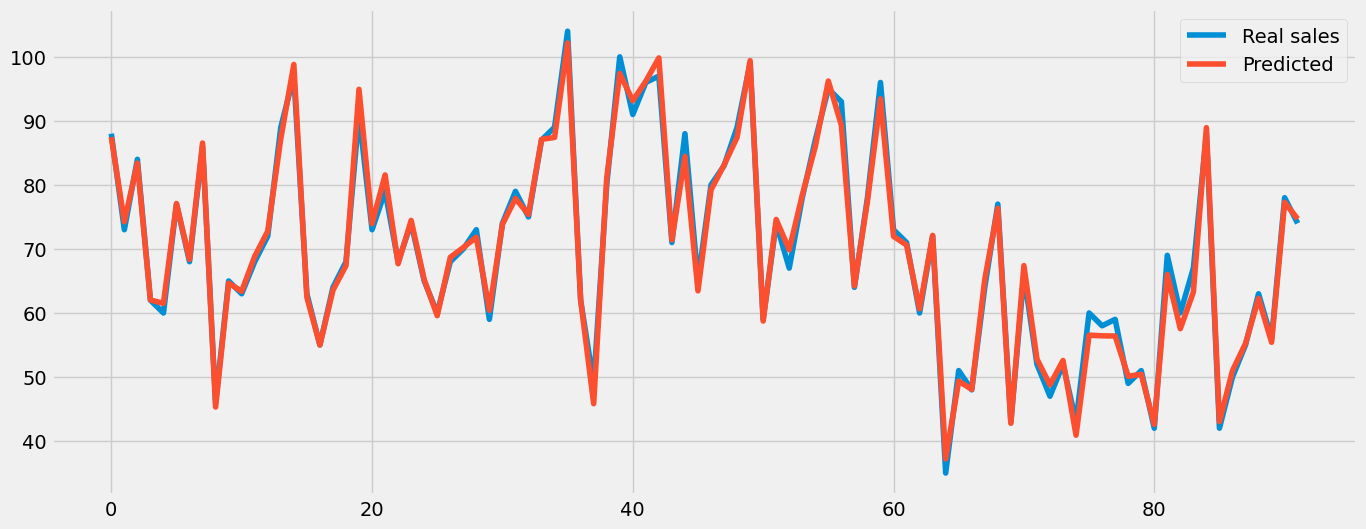

In [462]:
fig = plt.figure(figsize=(15, 6))
plt.plot(y_test.values, label = "Real sales");
plt.plot(y_pred, label = "Predicted");
plt.legend(); plt.show();